In [108]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(fastDummies)
library(reshape2)
library(Hmisc)
library(stats)
library(ggcorrplot)
library(plotly)
library(stringr)
library(rworldmap)
library(viridis)

In [109]:
df = read.csv('housing.csv')
head(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [110]:
df = drop_na(df)
head(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [111]:
df = dummy_cols(df, select_columns = 'ocean_proximity', remove_selected_columns = TRUE)

In [112]:
fig = function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)}

In [113]:
corr = round(cor(df), 1)

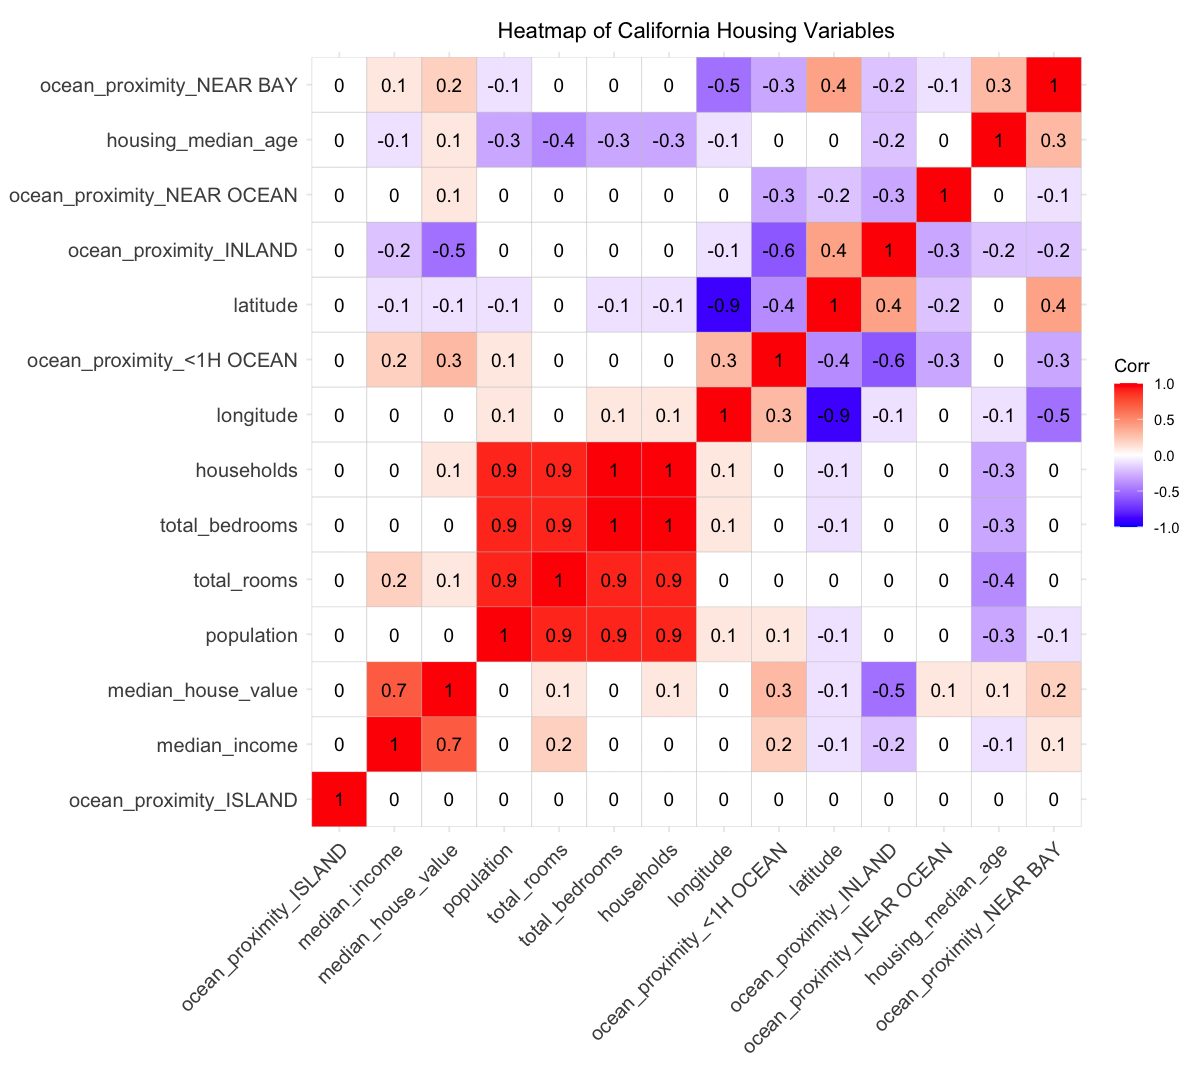

In [114]:
fig(10,9)
ggcorrplot(corr, hc.order = TRUE, lab = TRUE) +
ggtitle('Heatmap of California Housing Variables') +
  theme(plot.title = element_text(hjust = 0.5))

In [115]:
data.loess = loess(median_house_value ~ median_income * population, data = df)

In [116]:
xgrid = seq(min(df$median_income), max(df$median_income), 0.3)
ygrid =  seq(min(df$population), max(df$population), 0.3)
# Generate a dataframe with every possible combination of wt and hp
data.fit = expand.grid(median_income = xgrid, population = ygrid)
# Feed the dataframe into the loess model and receive a matrix output with estimates of
# acceleration for each combination of wt and hp
mtrx3d = predict(data.loess, newdata = data.fit)
mtrx3d[1:4, 1:4]

,population= 3.0,population= 3.3,population= 3.6,population= 3.9
median_income= 0.4999,120708.1,120689.6,120671.1,120652.6
median_income= 0.7999,123351.8,123334.1,123316.3,123298.6
median_income= 1.0999,127141.8,127125.6,127109.5,127093.3
median_income= 1.3999,132004.0,131989.8,131975.7,131961.5


In [117]:
mtrx.melt = melt(mtrx3d, id.vars = c('median_income', 'population'), measure.vars = 'median_house_value')
names(mtrx.melt) = c('median_income', 'population', 'median_house_value')

In [ ]:
mtrx.melt$median_income = as.numeric(str_sub(mtrx.melt$median_income,
                                             str_locate(mtrx.melt$median_income, '=')[1,1] + 1))
mtrx.melt$population =  as.numeric(str_sub(mtrx.melt$population,
                                           str_locate(mtrx.melt$population, '=')[1,1] + 1))

fig = plot_ly(mtrx.melt, x = ~median_income, y = ~population, z = ~median_house_value, type = "contour",
             width = 600, height = 500)

fig = fig %>% layout(
    title = 'Contour Plot of Home Values by Income and Population in CA')
orca(fig, 'plotly.png')
fig

In [100]:
world = getMap(resolution = "low")

Regions defined for each Polygons



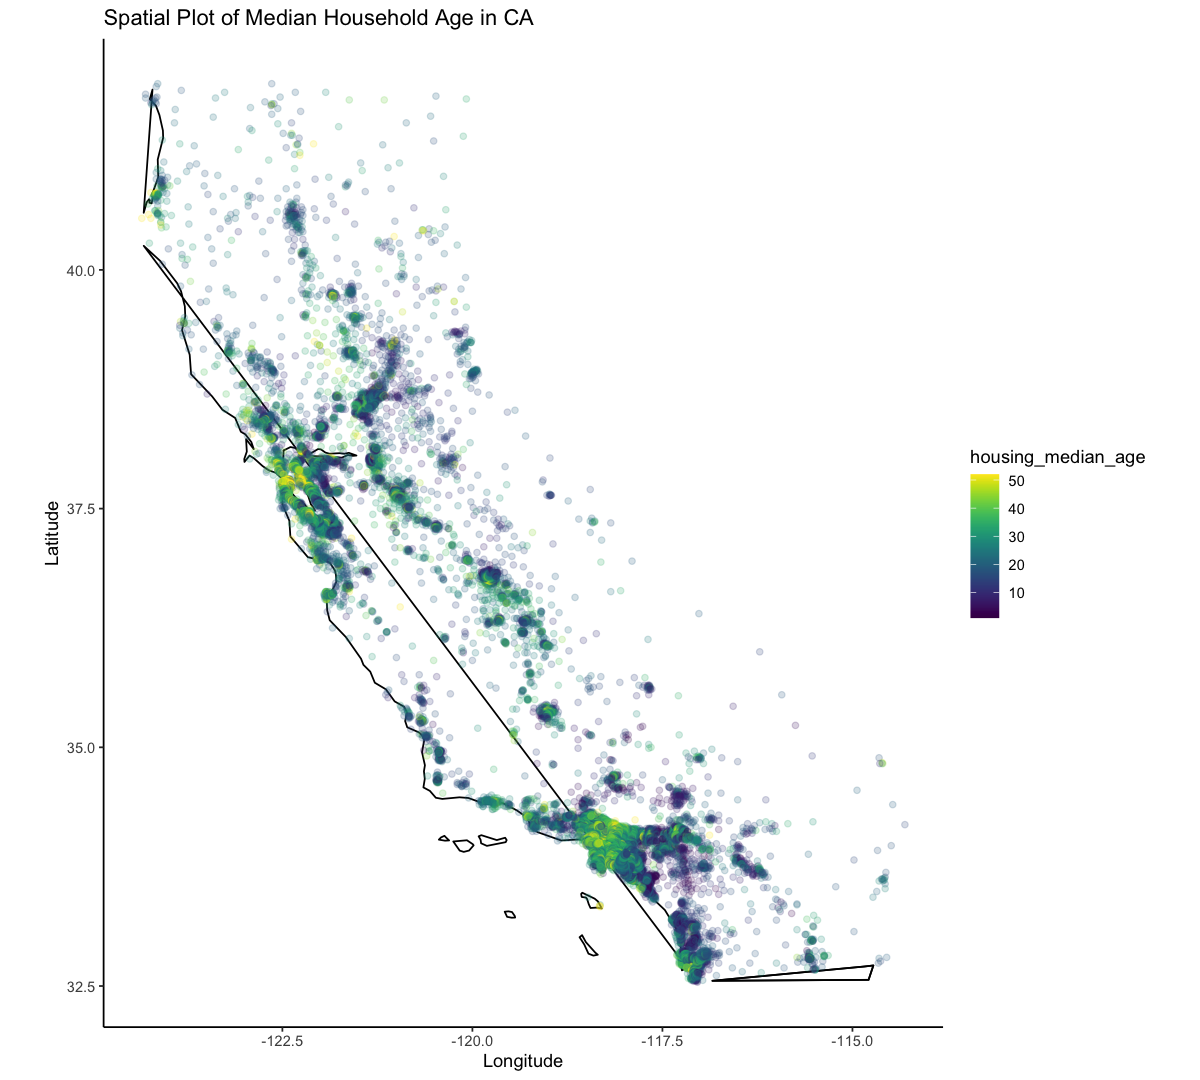

In [101]:
(with_world = ggplot() +
    geom_polygon(data = world, 
        aes(x = long, y = lat, group = group),
        fill = NA, colour = 'black') + 
    geom_point(alpha=0.2, data = df, aes(x = longitude, y = latitude, color = housing_median_age)) +
    scale_color_viridis(option = "D") +
    coord_quickmap() +  # Prevents stretching when resizing
    xlim(-124.35, -114.31) +  # Set x axis limits, xlim(min, max)
    ylim(32.54, 41.95) +  # Set y axis limits
    theme_classic() +  # Remove ugly grey background
    xlab('Longitude') +
    ylab('Latitude') +
    ggtitle('Spatial Plot of Median Household Age in CA'))